<a href="https://colab.research.google.com/github/nreddyabhinav/ML/blob/master/Python_Notebooks/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from scipy.io import loadmat
import numpy as np
import matplotlib as mpl

In [0]:
data = loadmat('drive/My Drive/ColabNo/nn/ex4data1.mat')
theta = loadmat('drive/My Drive/ColabNo/nn/ex4weights.mat')

In [0]:
ilu = 400
hlu = 25
olu = 10

x = np.array(data['X'])
y = np.array(data['y'])
theta1 = np.array(theta['Theta1'])
theta2 = np.array(theta['Theta2'])

In [0]:
print(y[1000:1005])
highest = max(y)[0]
Y = np.zeros((1,highest))
for i in y:
  temp = np.zeros((1,highest))
  temp[0][i[0]-1]=1
#   print(temp)
  Y = np.concatenate((Y,temp),axis=0)

Y= Y[1:]
print(Y[1000:1005])

[[2]
 [2]
 [2]
 [2]
 [2]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print(np.shape(theta1))
print(np.shape(theta2))
print(np.shape(x))
print(np.shape(y))

print(np.shape(Y))
m = np.shape(x)[0]
print(m)

(25, 401)
(10, 26)
(5000, 400)
(5000, 1)
(5000, 10)
5000


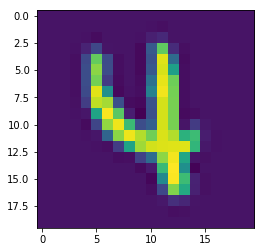

In [0]:
grid =np.reshape(x[2199,:],(20,20)).T

mpl.pyplot.imshow(grid,origin="upper")

# Sigmoid function :

In [0]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [0]:
def sigGradient(g):
  g = sigmoid(g)
  return g*(1-g)

#cost function

In [0]:
def cost(h):
  s = 0
  for i in range(0,m):
    s= s+ (np.matmul((-Y[i]),np.log(h[i]).T)-np.matmul((1-Y[i]),np.log((1-h[i] )).T ))
    
  return s/m

#vectorized and regularized cost function 

In [0]:
def costvec(h,l):
  return (np.sum(np.sum((-Y)*np.log(h),axis=1)-np.sum((1-Y)*np.log(1-h), axis=1))/m)+(np.sum(np.sum(theta1[:,1:]**2,axis=0))+np.sum(np.sum(theta2[:,1:]**2,axis=0)))*l/(2*m) 

#Get all the perceptron values (a^(i))

In [0]:
e1 = round((6**(0.5))/((hlu+ilu+1)**(0.5)),2)
print(e1)
theta1=np.random.uniform(-e1,e1,(hlu,ilu+1))
e2 = round((6**(0.5))/((hlu+olu+1)**(0.5)),2)
print(e2)
theta2=np.random.uniform(-e2,e2,(olu,hlu+1))
print(np.shape(theta1))
print(np.shape(theta2))

0.12
0.41
(25, 401)
(10, 26)


In [0]:


a1 = np.concatenate((np.ones((m,1)),x),axis=1)
a2 = np.concatenate((np.ones((m,1)),sigmoid(np.matmul(a1,theta1.T))),axis=1)
a3 = sigmoid(np.matmul(a2,theta2.T))


J = costvec(a3,1)
print(J)

7.221584636140757


In [0]:
print(sigGradient(0))
print(sigGradient(123))
print(sigGradient(-1213))

0.25
0.0
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
